In [1]:
import pandas as pd
import numpy as np

df = pd.read_excel('datatabt_2.xlsx')
df

,meantemp,meantemp1,meantemp2,humidity,wind_speed
0,8.666667,7.166667,10.000000,87.000000,4.633333
1,6.000000,8.666667,7.400000,71.333333,1.233333
2,7.000000,6.000000,7.166667,86.833333,3.700000
3,7.000000,7.000000,8.666667,82.800000,1.480000
4,8.857143,7.000000,6.000000,78.600000,6.300000
...,...,...,...,...,...
1455,15.238095,17.217391,17.142857,68.043478,3.547826
1456,14.095238,15.238095,16.850000,87.857143,6.000000
1457,14.095238,14.095238,17.217391,89.666667,6.266667
1458,15.052632,14.095238,15.238095,87.000000,7.325000


## Set up the dependent and independent variables

In [2]:
X = pd.DataFrame(df[['meantemp1', 'meantemp2', 'humidity', 'wind_speed']])
y = pd.DataFrame(df[['meantemp']])

## Independent Variables

In [3]:
X

,meantemp1,meantemp2,humidity,wind_speed
0,7.166667,10.000000,87.000000,4.633333
1,8.666667,7.400000,71.333333,1.233333
2,6.000000,7.166667,86.833333,3.700000
3,7.000000,8.666667,82.800000,1.480000
4,7.000000,6.000000,78.600000,6.300000
...,...,...,...,...
1455,17.217391,17.142857,68.043478,3.547826
1456,15.238095,16.850000,87.857143,6.000000
1457,14.095238,17.217391,89.666667,6.266667
1458,14.095238,15.238095,87.000000,7.325000


## Dependent Variable

In [4]:
y

,meantemp
0,8.666667
1,6.000000
2,7.000000
3,7.000000
4,8.857143
...,...
1455,15.238095
1456,14.095238
1457,14.095238
1458,15.052632


## Divide data into test and train sets

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train, X_test, y_train, y_test)

      meantemp1  meantemp2   humidity  wind_speed
1256  35.500000  36.133333  37.125000    9.162500
1173  26.625000  26.785714  43.375000   12.262500
1362  31.480000  31.240000  60.880000    2.986957
434   19.000000  20.714286  60.625000    9.950000
246   30.571429  31.714286  55.714286   10.042857
...         ...        ...        ...         ...
1068  17.625000  17.500000  76.875000    2.312500
29    16.000000  14.714286  73.000000    2.220000
72    20.333333  22.333333  67.666667    3.700000
770   15.500000  15.750000  69.625000    6.025000
558   33.125000  31.625000  62.625000    8.825000

[1168 rows x 4 columns]       meantemp1  meantemp2   humidity  wind_speed
233   32.000000  29.166667  71.250000   18.525000
1146  21.428571  21.000000  50.642857    9.785714
978   31.625000  31.250000  47.000000   11.812500
646   25.714286  27.625000  57.142857    6.937500
1116  11.187500  11.733333  86.250000    6.625000
...         ...        ...        ...         ...
49    20.000000  15.85714

In [6]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1168, 4)
(292, 4)
(1168, 1)
(292, 1)


## Train the algorithm

In [7]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Control the coefficients the model chosen

In [8]:
v = pd.DataFrame(regressor.coef_,index=['Co-efficient']).transpose()
w = pd.DataFrame(X.columns, columns=['Attribute'])

In [9]:
coeff_df = pd.concat([w,v], axis=1, join='inner')
coeff_df
# y = B1.X1 + B2.X2 + B3.X3 + B4.X4
# B = COEFFICIENT
# X = INPUT (ATTRIBUTE)

,Attribute,Co-efficient
0,meantemp1,0.875004
1,meantemp2,0.111932
2,humidity,0.006457
3,wind_speed,0.000003


## Comparing Predicted value to the actual value

In [10]:
y_pred = regressor.predict(X_test)
y_pred = pd.DataFrame(y_pred, columns=['Predicted meantemp'])
y_pred

,Predicted meantemp
0,31.669584
1,21.372343
2,31.418038
3,25.905871
4,11.604053
...,...
287,19.654148
288,31.905034
289,29.513552
290,25.753793


In [11]:
y_test

,meantemp
233,29.000000
1146,21.687500
978,31.000000
646,26.000000
1116,11.666667
...,...
49,20.500000
486,29.750000
917,26.625000
461,26.375000


In [12]:
date = pd.read_excel('date.xlsx')
date

,date
0,2013-01-01
1,2013-01-02
2,2013-01-03
3,2013-01-04
4,2013-01-05
...,...
287,2013-10-15
288,2013-10-16
289,2013-10-17
290,2013-10-18


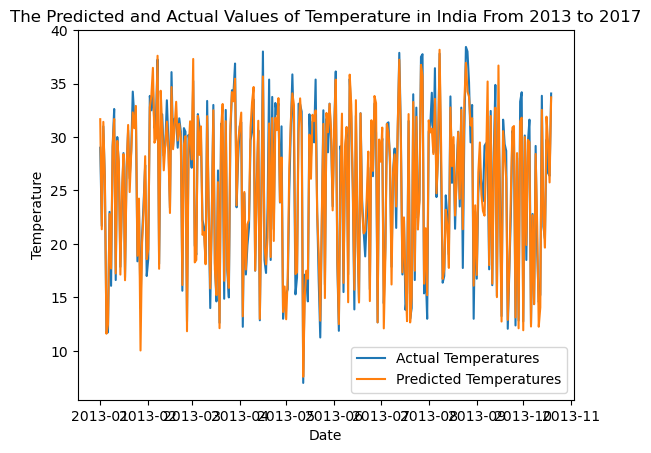

In [13]:
import matplotlib.pyplot as plt

x1 = date
x2 = date

y_show = y_test

y2 = y_pred

plt.plot(x1, y_show, label = 'Actual Temperatures')

plt.plot(x2, y2, label = 'Predicted Temperatures')

plt.legend(['Actual Temperatures', 'Predicted Temperatures'])

plt.xlabel('Date')

plt.ylabel('Temperature')

plt.title('The Predicted and Actual Values of Temperature in India From 2013 to 2017')

plt.show()

## Evaluate the algorithm

In [14]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 1.194475662215314
Mean Squared Error: 2.520348175926533
Root Mean Squared Error: 1.5875604479598668


In [15]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, y_pred)
print('%',mean_absolute_percentage_error(y_test, y_pred)*100)

% 5.075104993039494
